Adjacency Matrix:
[[0. 1. 1. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]]


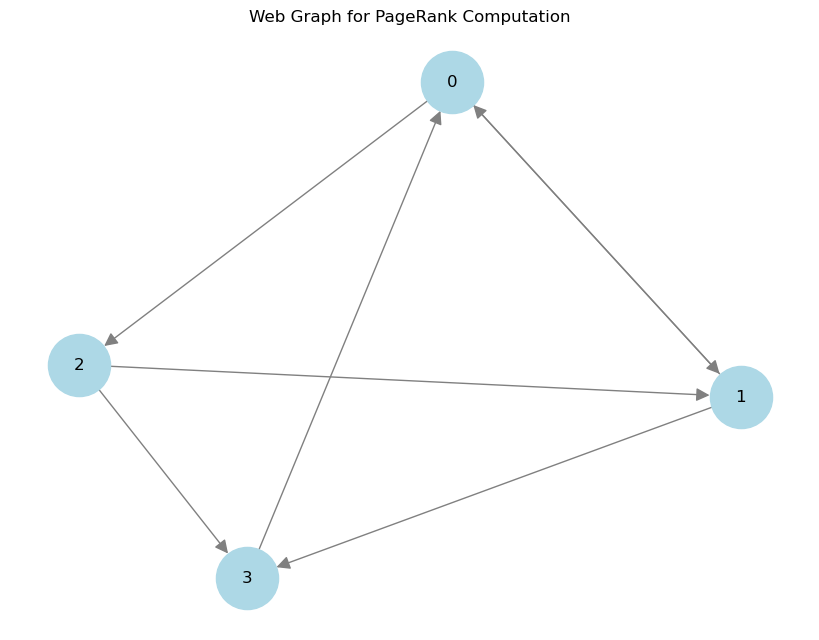


Row-Stochastic Link Matrix A:
[[0.  0.5 0.5 0. ]
 [0.5 0.  0.  0.5]
 [0.  0.5 0.  0.5]
 [1.  0.  0.  0. ]]
[[0.5 0.5 0.5 0.5]
 [0.3 0.3 0.3 0.3]
 [0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1]]

Google Matrix G (Row-Stochastic):
[[0.075 0.5   0.5   0.075]
 [0.47  0.045 0.045 0.47 ]
 [0.015 0.44  0.015 0.44 ]
 [0.865 0.015 0.015 0.015]]

Matrix A = I - G + epsilon * I:
[[ 0.925001 -0.5      -0.5      -0.075   ]
 [-0.47      0.955001 -0.045    -0.47    ]
 [-0.015    -0.44      0.985001 -0.44    ]
 [-0.865    -0.015    -0.015     0.985001]]

Permutation Matrix P:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Lower Triangular Matrix L:
[[ 1.          0.          0.          0.        ]
 [-0.50810756  1.          0.          0.        ]
 [-0.0162162  -0.63928936  1.          0.        ]
 [-0.93513412 -0.68844993 -0.87621354  1.        ]]

Upper Triangular Matrix U:
[[ 0.925001   -0.5        -0.5        -0.075     ]
 [ 0.          0.70094722 -0.29905378 -0.50810807]
 [ 0.          0. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import lu

# Define the web graph as an adjacency matrix
# Page 1 → Page 2, Page 3
# Page 2 → Page 1, Page 4
# Page 3 → Page 2, Page 4
# Page 4 → Page 1

n = 4  # number of pages
adj_matrix = np.array([
    [0, 1, 1, 0],  # Page 1
    [1, 0, 0, 1],  # Page 2
    [0, 1, 0, 1],  # Page 3
    [1, 0, 0, 0]   # Page 4
], dtype=float)

print("Adjacency Matrix:")
print(adj_matrix)


# Visualize the web graph
G_graph = nx.DiGraph()
#edges = [(0, 1), (0, 2), (1, 0), (1, 3), (2, 1), (2, 3), (3, 0)]
rows, cols = np.where(adj_matrix == 1)
edges = list(zip(rows, cols))
G_graph.add_edges_from(edges)

pos = nx.spring_layout(G_graph)
plt.figure(figsize=(8, 6))
nx.draw(G_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, arrowsize=20)
plt.title("Web Graph for PageRank Computation")
plt.show()



# Normalize rows to create a row-stochastic link matrix A
row_sums = adj_matrix.sum(axis=1, keepdims=True)
link_matrix = adj_matrix / row_sums
print("\nRow-Stochastic Link Matrix A:")
print(link_matrix)

# Damping factor
alpha = 0.85


# Personalized teleportation vector (used as a row matrix now)

v = np.array([0.5, 0.3, 0.1, 0.1])
v = v / np.sum(v)  # just in case it is not normalized
v = v.reshape(-1, 1)
v_personalized = np.tile(v, (1, n))

print(v_personalized)


# Google matrix G using row-stochastic matrix
G = alpha * link_matrix + (1 - alpha) * v_personalized
print("\nGoogle Matrix G (Row-Stochastic):")
print(G)

# Construct the matrix (I - G + epsilon*I) and right-hand side vector
epsilon = 1e-6
I = np.eye(n)
A = I - G + epsilon * I
b = epsilon * np.ones(n)

print("\nMatrix A = I - G + epsilon * I:")
print(A)

# Perform LU decomposition
P, L, U = lu(A)

print("\nPermutation Matrix P:")
print(P)
print("\nLower Triangular Matrix L:")
print(L)
print("\nUpper Triangular Matrix U:")
print(U)

# Solve Ly = Pb
Pb = P @ b
y = np.linalg.solve(L, Pb)

# Solve Ux = y
x = np.linalg.solve(U, y)

# Normalize the PageRank vector
pagerank = x / np.sum(x)

print("\nStandard PageRank Vector (Uniform Teleportation, Row-Stochastic):")
for i, rank in enumerate(pagerank, start=1):
    print(f"Page {i}: PageRank = {rank:.4f}")


